In [1]:
# Função para deixar o jupyter com celulas preenchendo toda a tela
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Importação das bibliotecas python:

# Bibliotecas para trabalhar com dados e graficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Bibliotecas do scikit-learn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Biblioteca para exportações e importações de arquivos
from joblib import dump, load

# Utilitário de GPU
from numba import cuda

# Biblioteca para implementar uma barra de progresso
import progressbar

# Biblioteca para tocar sons
import pygame

# Bibliotecas para Deep Learning
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, LayerNormalization, BatchNormalization, Flatten, Dense, Reshape, Dropout

from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import BinaryCrossentropy

# Bibliotecas para plotar graficos do keras
import pydot as pyd
import pydotplus
from pydotplus import graphviz
from tensorflow.keras.utils import plot_model, model_to_dot
tensorflow.keras.utils.pydot = pyd

pygame 2.4.0 (SDL 2.26.4, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import cpuinfo
import subprocess

# Função para obter informações da GPU AMD 
# (NO MEU CASO É AMD, ENTÃO NÃO UTILIZARÁ A GPU E SIM A CPU, MAS MOSTRA O DEVICE DISPONÍVEL.)
def get_amd_gpu_info():
    cpu_info = cpuinfo.get_cpu_info()
    if 'AMD' in cpu_info['brand_raw']:
        cmd_output = subprocess.check_output('wmic path win32_VideoController get Name', shell=True).decode('utf-8')
        lines = cmd_output.strip().split('\n')
        for line in lines[1:]:
            if 'Vega 3' in line:
                return line.strip()

# Obtendo as informações da GPU
gpu_info = get_amd_gpu_info()

# Verificando se há uma GPU AMD disponível
if gpu_info:
    print(f"GPU Device Name: {gpu_info}")
else:
    print("GPU não encontrada")


GPU Device Name: AMD Radeon(TM) Vega 3 Graphics


In [4]:
# Lista de nomes das colunas
col_names = ['s1', 'c1', 's2', 'c2', 's3', 'c3', 's4', 'c4', 's5', 'c5', 'class']

# Importação dos dados a partir de um arquivo CSV
data = pd.read_csv('dataset/pokerhand_dataset.csv', header=0)

# Seleciona aleatoriamente apenas 25000 registros dos dados
data = data.sample(n=25000, random_state=42)

# Converte todos os valores dos dados para o tipo float
data = data.astype(float)

# Realiza a codificação "one-hot" das colunas 's1', 'c1', 's2', 'c2', 's3', 'c3', 's4', 'c4', 's5' e 'c5'
one_hot_columns = ['s1', 'c1', 's2', 'c2', 's3', 'c3', 's4', 'c4', 's5', 'c5']
data_encoded = pd.get_dummies(data, columns=one_hot_columns)

# Atualiza o conjunto de dados com as colunas codificadas
data = data_encoded

# Lista de nomes das variáveis de entrada (todas as colunas exceto a última)
x_names = data_encoded.columns[:-1].tolist()

# Lista de nome da variável de saída (última coluna)
y_names = data_encoded.columns[-1:].tolist()


In [5]:
data

,class,s1_1.0,s1_2.0,s1_3.0,s1_4.0,c1_1.0,c1_2.0,c1_3.0,c1_4.0,c1_5.0,...,c5_4.0,c5_5.0,c5_6.0,c5_7.0,c5_8.0,c5_9.0,c5_10.0,c5_11.0,c5_12.0,c5_13.0
8170,0.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8279,0.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
19068,0.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13267,0.0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10883,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16023,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11363,1.0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14423,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21962,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Define uma variável para exportar os datasets tratados
export_frames = True

# Define uma variável para gerar um novo modelo ou usar um modelo pronto
new_model = True


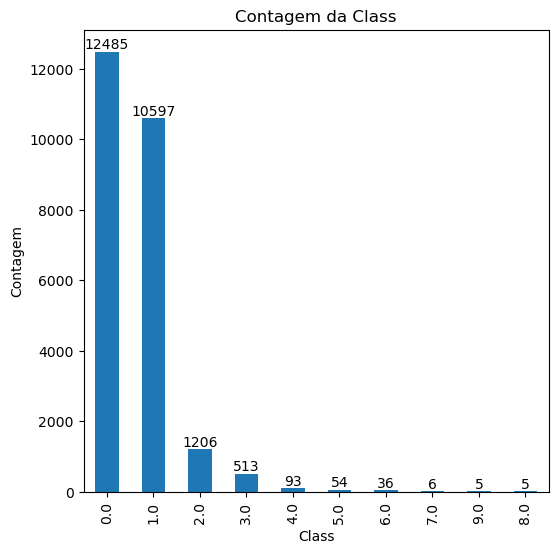

In [7]:
# Conta os diagnósticos
class_counts = data['class'].value_counts()

# Plota o gráfico de barras
plt.figure(figsize=(6, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Contagem')
plt.title('Contagem da Class')

# Adiciona os rótulos de contagem acima de cada barra
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


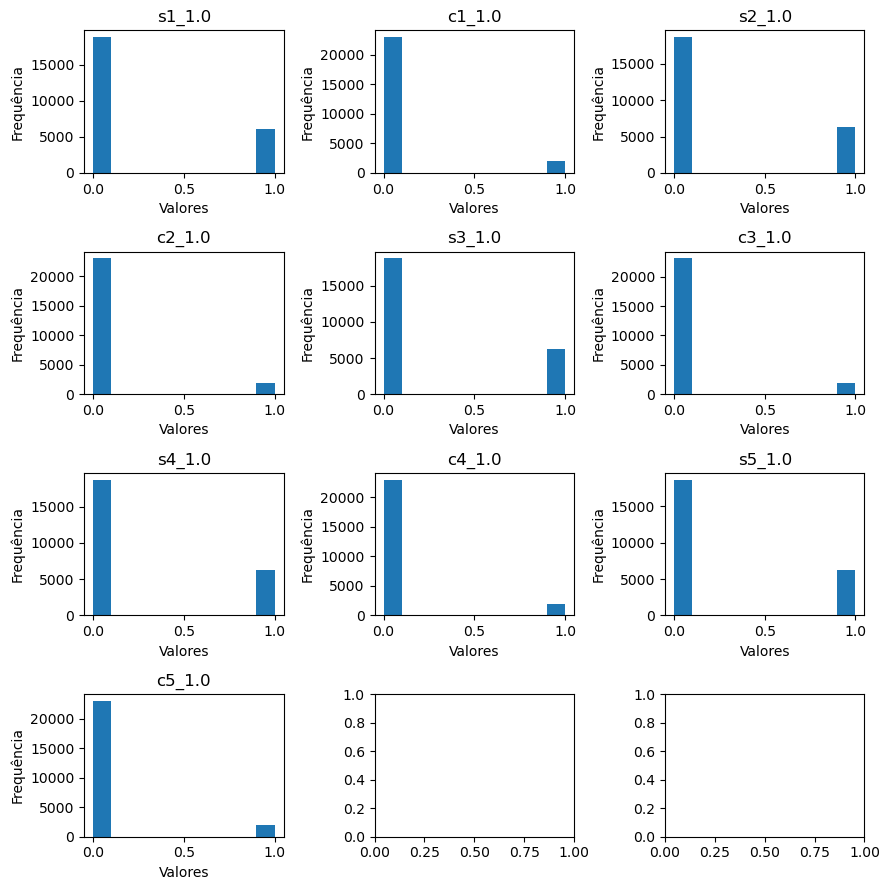

In [8]:
import matplotlib.pyplot as plt

# Criar uma figura e um array de subplots
fig, axs = plt.subplots(4, 3, figsize=(9, 9), tight_layout=True)

# Lista dos nomes dos atributos x
x_names = ['s1_1.0', 'c1_1.0', 's2_1.0', 'c2_1.0', 's3_1.0', 'c3_1.0', 's4_1.0', 'c4_1.0', 's5_1.0', 'c5_1.0']

# Iterar sobre os atributos e os subplots
for i, atributo in enumerate(x_names):
    row = i // 3  # Linha atual
    col = i % 3   # Coluna atual
    
    # Plotar o histograma do atributo no subplot correspondente
    axs[row, col].hist(data[atributo], bins=10)
    
    # Definir o título do subplot como o nome do atributo
    axs[row, col].set_title(atributo)
    
    # Definir rótulos dos eixos x e y
    axs[row, col].set_xlabel('Valores')
    axs[row, col].set_ylabel('Frequência')

# Exibir a figura
plt.show()


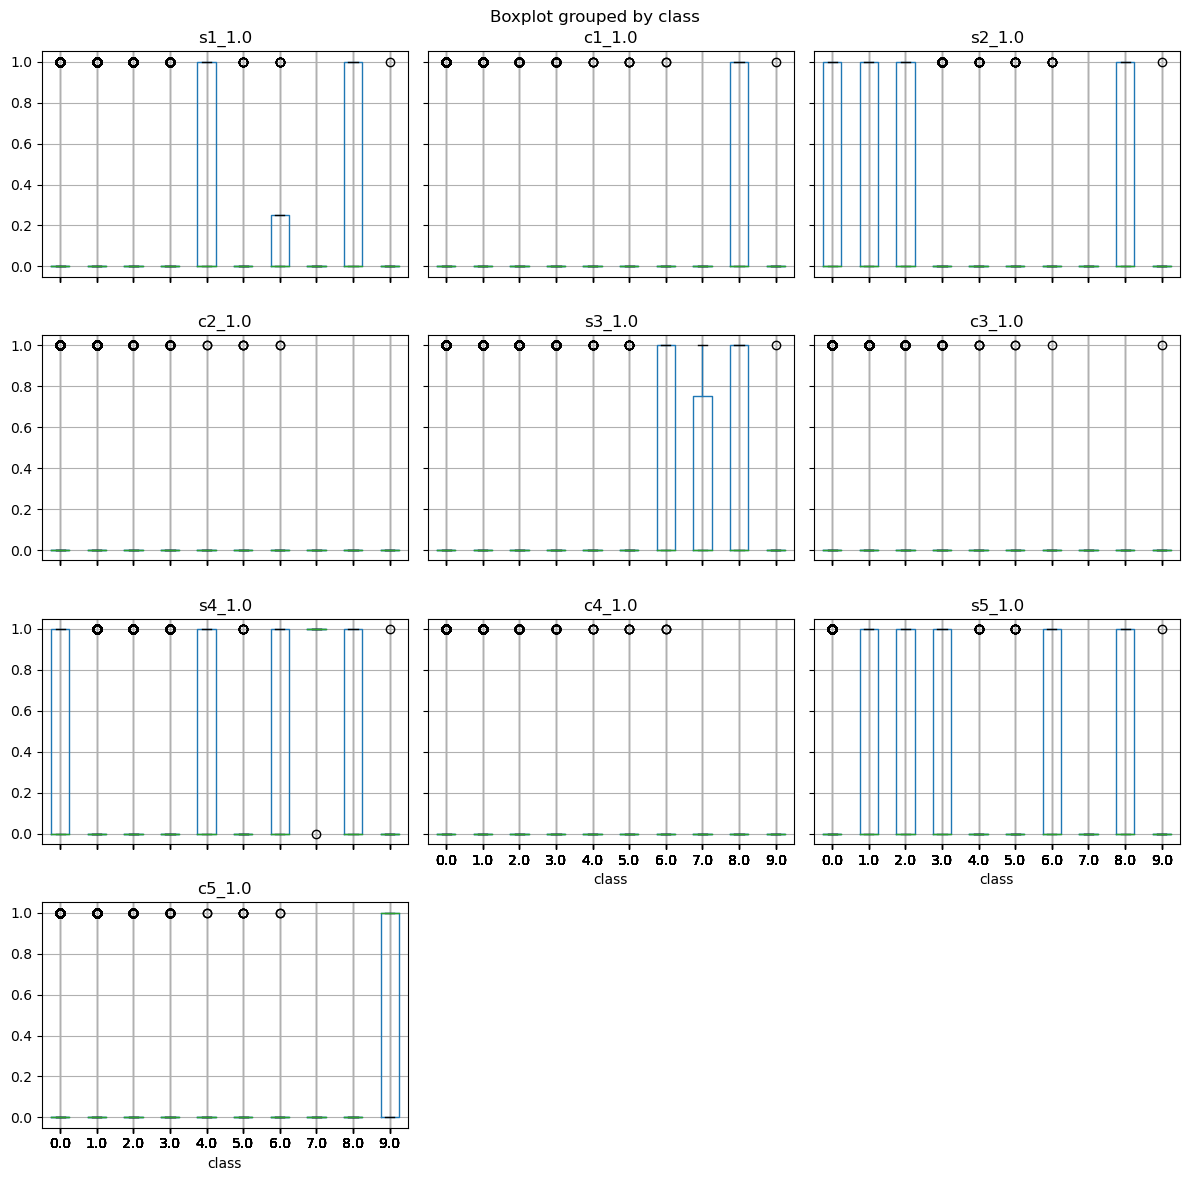

In [9]:
# Gerar um gráfico de boxplot para cada atributo x, agrupado por classe
data.boxplot(column=x_names, by='class', figsize=(12, 12))

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [10]:
if export_frames:
    # Inicialização da barra de progresso
    bar = progressbar.ProgressBar(maxval=len(data), widgets=[progressbar.Bar("=", "[", "]"), " ", progressbar.Percentage()])
    bar.start()

    # Listas para armazenar os frames
    x_frames = []
    y_frames = []

    for _, row in data.iterrows():
        # Adiciona os valores das colunas x_names e y_names às respectivas listas
        x_frames.append(row[x_names].values)
        y_frames.append(row[y_names].values)
        
        # Atualiza a barra de progresso
        bar.update(len(x_frames))
        
    # Converte as listas em arrays NumPy
    x_frames = np.array(x_frames)
    y_frames = np.array(y_frames)
    
    # Salva os arrays em arquivos
    dump(x_frames, 'dataset/x_frames.joblib')
    dump(y_frames, 'dataset/y_frames.joblib')

    # Finaliza a barra de progresso
    bar.finish()
else:
    # Carrega os arrays a partir dos arquivos
    x_frames = load('dataset/x_frames.joblib')
    y_frames = load('dataset/y_frames.joblib')

# Imprime as formas (shapes) dos arrays
print(x_frames.shape)
print(y_frames.shape)


[                                                                        ]   0%
[                                                                        ]   1%
[=                                                                       ]   2%
[==                                                                      ]   3%
[===                                                                     ]   5%
[====                                                                    ]   6%
[=====                                                                   ]   7%
[======                                                                  ]   8%
[=======                                                                 ]  10%
[========                                                                ]  11%
[=========                                                               ]  12%
[==========                                                              ]  13%
[==========                             

(25000, 10)
(25000, 1)


In [11]:
# Divisão dos dados em conjunto de treinamento/validação/teste
x_train_val, x_test, y_train_val, y_test = train_test_split(x_frames, y_frames, test_size=0.3, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.3, shuffle=True)

# Impressão das formas (shapes) dos conjuntos de dados
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(12250, 10)
(12250, 1)
(5250, 10)
(5250, 1)
(7500, 10)
(7500, 1)


In [12]:
import tensorflow as tf
from tensorflow.keras import layers

act_function = 'sigmoid'
drop = 0.1
initializer = tf.keras.initializers.lecun_normal()

# Definição da entrada
inputs = tf.keras.Input(shape=(x_train.shape[1],), dtype='float32')

# Camada 1
layer1 = layers.Dense(128, activation=act_function, kernel_initializer=initializer)(inputs)
layer1 = layers.BatchNormalization()(layer1)
layer1 = layers.Dropout(drop)(layer1)

# Camada 2
layer2 = layers.Dense(32, activation=act_function, kernel_initializer=initializer)(layer1)
layer2 = layers.BatchNormalization()(layer2)
layer2 = layers.Dropout(drop)(layer2)

# Camada 3
layer3 = layers.Dense(32, activation=act_function, kernel_initializer=initializer)(layer2)
layer3 = layers.BatchNormalization()(layer3)
layer3 = layers.Dropout(drop)(layer3)

# Camada 4
layer4 = layers.Dense(32, activation=act_function, kernel_initializer=initializer)(layer3)
layer4 = layers.BatchNormalization()(layer4)
layer4 = layers.Dropout(drop)(layer4)

# Camada de saída
outputs = layers.Dense(y_train.shape[1], activation=act_function, kernel_initializer=initializer)(layer4)

# Criação do modelo
dnn_pokerhand = tf.keras.Model(inputs, outputs)


c:\Users\yanky\anaconda3\envs\tensorflow_env\lib\site-packages\keras\initializers\initializers_v2.py:121: UserWarning: The initializer LecunNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  f"The initializer {self.__class__.__name__} is unseeded "


In [13]:
# Exibe as informações do modelo

dnn_pokerhand.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                             

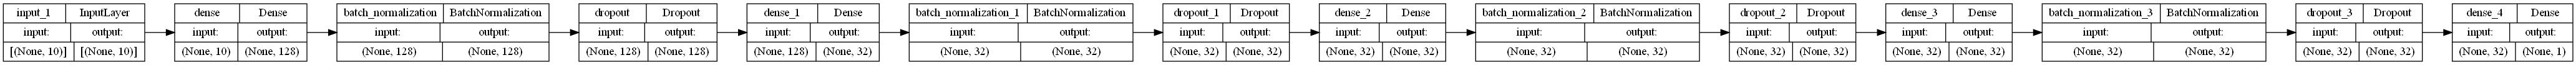

In [14]:
plot_model(dnn_pokerhand, show_shapes=True, show_layer_names=True, rankdir="LR")  #TB para plotar na vertical

In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

if new_model == False:
    # Define o valor de epsilon para 1
    tf.keras.backend.set_epsilon(1)
    
    # Define o otimizador Adam com taxa de aprendizagem de 0.0001
    opt = Adam(learning_rate=0.0001)

    # Compila o modelo usando o otimizador, a função de perda e as métricas
    dnn_pokerhand.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Configuração do ponto de verificação para salvar os pesos do modelo durante o treinamento
    cp = ModelCheckpoint(
        filepath='models/model_weights.h5',
        save_weights_only=True,
        monitor='loss',
        mode='min',
        save_best_only=True
    )

    # Configuração do Early Stopping para interromper o treinamento se a perda não melhorar
    es = EarlyStopping(monitor='loss', mode='min', patience=100)

    # Treinamento do modelo
    history = dnn_pokerhand.fit(
        x_train,
        y_train,
        validation_data=(x_val, y_val),
        epochs=1000,
        verbose=1,
        callbacks=[es, cp],
        batch_size=64,
        shuffle=False
    )

    # Salva o histórico de treinamento em um arquivo numpy
    np.save('models/history_model.npy', history.history)
    
    # Salva o modelo treinado em um arquivo h5
    dnn_pokerhand.save('models/dnn_pokerhand.h5')
else:
    # Carrega um modelo pré-treinado
    dnn_pokerhand = load_model('models/dnn_pokerhand.h5')


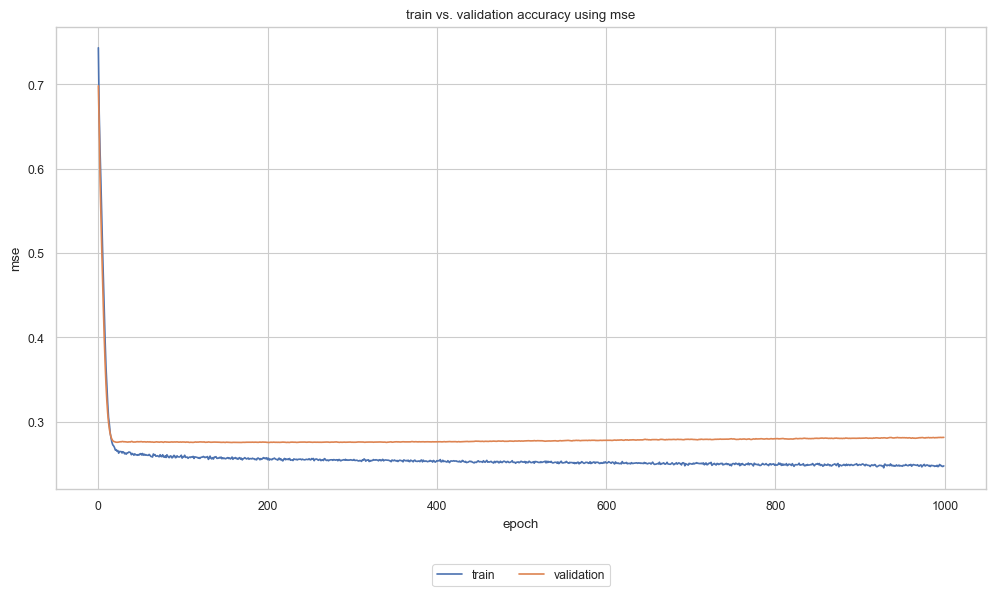

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo numpy contendo o histórico de treinamento
history = np.load('models/history_model.npy', allow_pickle='TRUE').item()

# Configurar o estilo e contexto do gráfico
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style('whitegrid')
sns.set_context('paper')

# Obter as métricas de treinamento e validação do histórico
train_metric = history['loss']
valid_metric = history['val_loss']
name_metric = 'mse'  # Nome da métrica

# Criar uma nova figura
fig = plt.figure()

# Plotar as métricas de treinamento e validação
plt.plot(train_metric, label='train')
plt.plot(valid_metric, label='validation')
plt.ylabel(name_metric)
plt.xlabel('epoch')
plt.title('train vs. validation accuracy using ' + name_metric)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)

# Exibir o gráfico
plt.show()


In [17]:
y_hat = dnn_pokerhand.predict(x_test)
y_hat, y_test = (y_hat > 0.5, y_test > 0.5)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
235/235 [==============================] - 1s 2ms/step


In [18]:
from sklearn.metrics import confusion_matrix

# Calculando a matriz de confusão
cm = confusion_matrix(y_test.tolist(), y_hat.tolist())

# Calculando a taxa de acerto
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
accuracy_percent = round(accuracy * 100, 2)

# Exibindo a taxa de acerto
print("Taxa de Acerto: {:.2f}%".format(accuracy_percent))


Taxa de Acerto: 92.45%


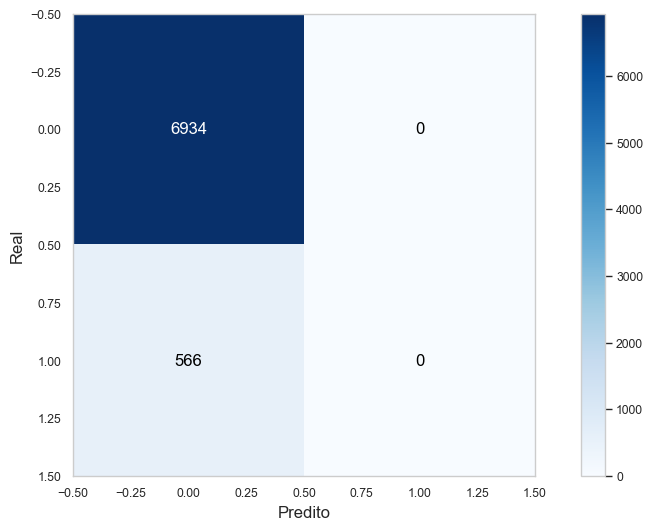

In [19]:
import matplotlib.pyplot as plt

# Configurar a grade do gráfico como False
plt.grid(False)

# Plotar a matriz de confusão
plt.imshow(cm, cmap='Blues')

# Definir rótulos dos eixos
plt.xlabel('Predito', fontsize=12)
plt.ylabel('Real', fontsize=12)

# Definir o limiar para a cor do texto
threshold = cm.max() / 2.0

# Iterar sobre os elementos da matriz de confusão
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        # Definir a cor do texto com base no limiar
        color = 'white' if cm[i, j] > threshold else 'black'
        
        # Adicionar o valor da matriz como texto no gráfico
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color=color, fontsize=12)

# Adicionar a barra de cores
plt.colorbar()

# Exibir o gráfico
plt.show()


In [20]:
# Toca um som para avisar que terminou de executar
pygame.mixer.init()
arquivo_mp3 = 'support_files/mario_coin.mp3'
pygame.mixer.music.load(arquivo_mp3)
pygame.mixer.music.play()

while pygame.mixer.music.get_busy():
    continue
    
print('Programa finalizado, tudo certo!')

Programa finalizado, tudo certo!
